In [1]:
from google.colab import drive
drive._mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
pre_trained_model_2 = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(500, 400, 3))


74850304/74836368 [==============================] - 1s 0us/step


In [4]:
x = layers.GlobalAveragePooling2D()(pre_trained_model_2.output)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense  (1, activation='sigmoid')(x)

model = Model( pre_trained_model_2.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
train_dir = "/content/gdrive/My Drive/FYP/data/train"
test_dir = "/content/gdrive/My Drive/FYP/data/test"

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )


# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 10,
                                                    class_mode = 'binary',
                                                    target_size = (500, 400))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( test_dir,
                                                          batch_size  = 10,
                                                          class_mode  = 'binary',
                                                          target_size = (500, 400))

Found 584 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


In [7]:
filepath="/content/gdrive/My Drive/FYP/data/model/images_applypreprocess.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 50,
            epochs = 50,
            validation_steps = 10,
            verbose = 2,
            callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/50

Epoch 00001: val_acc improved from -inf to 0.64000, saving model to /content/gdrive/My Drive/FYP/data/model/images_applypreprocess.hdf5
50/50 - 82s - loss: 0.2028 - acc: 0.9190 - val_loss: 0.9210 - val_acc: 0.6400 - 82s/epoch - 2s/step
Epoch 2/50

Epoch 00002: val_acc improved from 0.64000 to 0.73000, saving model to /content/gdrive/My Drive/FYP/data/model/images_applypreprocess.hdf5
50/50 - 82s - loss: 0.2603 - acc: 0.8907 - val_loss: 1.2729 - val_acc: 0.7300 - 82s/epoch - 2s/step
Epoch 3/50

Epoch 00003: val_acc did not improve from 0.73000
50/50 - 75s - loss: 0.2002 - acc: 0.9069 - val_loss: 1.3959 - val_acc: 0.6000 - 75s/epoch - 1s/step
Epoch 4/50

Epoch 00004: val_acc did not improve from 0.73000
50/50 - 75s - loss: 0.2254 - acc: 0.9049 - val_loss: 2.1840 - val_acc: 0.7300 - 75s/epoch - 1s/step
Epoch 5/50

Epoch 00005: val_acc improved from 0.73000 to 0.79000, saving model to /content/gdrive/My Drive/FYP/data/model/images_applypreprocess.hdf5
50/50 - 83s - loss: 0.2269

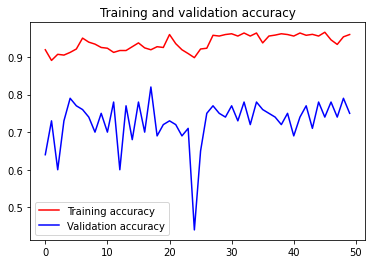

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()